#### Temat i cel pracy
___
Tematem pracy jest analiza zbioru zbioru danych **California Housing Prices**.
Celem jest stworzenie modelu cen mieszkań w Kalifornii przy użyciu spisu ludności.
Wspomniany model powinen przewidywać cenę mieszkań w danym dystrykcie za pomocą innych danych opisujący dany obszar.

<br />

#### Spis treści
___
<ul>
    <li>
        <a href="#Wstęp">Wstęp</a>
    </li>
    <li>
        <a href="#Wstęp">Dobór modelu predykcyjnego, testowanie oraz jego ocena</a>
    </li>
    <li>
        <a href="#Wstępna-analiza-danych">Wstępna analiza danych</a>
    </li>
    <li>
        <a href="#Podział-danych-na-zbiór-uczący-oraz-testowy">Podział danych na zbiór uczący oraz testowy</a>
    </li>
    <li>
        <a href="#Odkrywanie-zależności-i-wizualizacja-danych">Odkrywanie zależności i wizualizacji danych</a>
    </li>
    <li>
        <a href="#Poszukiwanie-korelacji">Poszukiwanie korelacji</a>
    </li>
    <li>
        <a href="Przygotowanie-danych-pod-uczenie-maszynowe">Przygotowanie danych pod uczenie maszynowe</a>
    </li>
    <li>
        <a href="#Trenowanie-i-ocena-modelu-za-pomocą-zbioru-uczącego">Trenowanie i ocena modelu za pomocą zbioru uczącego</a>
    </li>
    <li>
        <a href="#Co-poszło-nie-tak?-Czyli-sprawdzamy-inne-modele.">Co poszło nie tak? Czyli sprawdzamy inne modele.</a>
    </li>
    <li>
        <a href="#Przygotowanie-danych-pod-uczenie-maszynowe">Przygotowanie danych pod uczenie maszynowe</a>
    </li>
    <li>
        <a href="#Dostrojenie-modelu">Dostrojenie modelu</a>
    </li>
    <li>
        <a href="#Ocena-modelu-za-pomocą-zbioru-testowego">Ocena modelu za pomocą zbioru testowego</a>
    </li>
</ul>

<br />

#### Źródło danych
___

Do realizacji zadania zdecydowałem się użyć danych ze spisu ludności. Dane te zawierają takie informacje jak stan populacji, mediana dochodów, mediana cen mieszkań, itp.

Źródło danych, z którego korzystaliśmy podczas wykonania ćwiczenia: https://www.kaggle.com/camnugent/california-housing-prices.

<br />

#### Środowisko
___
Poniższe ćwiczenie wykonano z pomocą bibliotek:
jupyter, matplotlib, numpy, pandas, scikit-learn.

Można również wykorzystać Python Anacoda.

<br />

#### Wykonał:
---
|   Imię  | Nazwisko  |            E-mail           |
|:-------:|:---------:|:---------------------------:|
| Mateusz |Głowiński  |   mglowinski93@gmail.com    |

## Wstęp

Uczenie maszynowe powszechnie zwykło nazywać się dziedzinę nauki programowania komputerów w sposób umożliwiający im uczenie się z danych.

Wsród uczenia maszynowego można wyróżnić podział na 3 kategorie ze względu na sposób uczenia się algorytmu:

<ul>
  <li>Uczenie nadzorowane</li>
  <li>Uczenie nienadzorowane</li>
  <li>Uczenie przez wzmacnianie</li>
</ul>

<br />

##### Uczenie nadzorowane (ang. Supervised learning)

Głównym celem uczenia nadzorowanego jest jest uczenie modelu za pomocą danych uczących, które zawierają dołączone rozwiązania problemu (tzw. etykietę). Pozwala to na przygotowanie modelu, który będzie przewidywał niewidoczne lub wygenerowane w przyszłości informacje.

![Supervised learning process](./images/SupervisedLearningScheme.png)

Klasycznym zadaniem uczenia nadzorowanego jest klasyfikacja (ang. classification), czyli przewidywanie etykiety na podstawie dotychczasowych przykładów.  Dobrym przykładem tego procesu jest filtr spamu.
Innym typowym zadaniem tego sposobu uczenia jest przewidywanie docelowej wartości numerycznej (tzw. zmienna objaśniana) przy użyciu określonego zbioru cech zwanych czynnikami predykcyjnymi (tzw. zmienne objaśniające). Taki typ zadania nosi nazwę regresji.

Uczenie nadzorowane wymaga podania wielu przykładów danych, aby otrzymać realistyczne prognozy.

<br />

##### Uczenie przez wzmacnianie (ang. Reinforcement learning)

W przypadku uczenia przez wzmacnianie, system uczący (tzw. agent) obserwuje środowisko, dobiera i wykonuje czynności.
Informacja zwrotna na podjęte decyzje trafia do agenta jako sygnał nagrody lub kary.
System powinien samodzielnie nauczyć się najlepszej strategii (tzw. polityki), tak aby uzyskać jak najlepszą nagrodę.
Po tym jak model zostanie nauczyony możemy powiedzieć, że poltyka definiuje najlepsze działania, jakie agent powinien wybrać w danej sytuacji.

![Reinforcement learning process](./images/ReinforcementLearningScheme.png)

Popularnym przykładem uczenia przez wzmacnianie jest silnik aplikacji szachowej. Agent wybiera kolejne ruchy figur szachowych na podstawie stanu szachownicy (środowiska), a nagrodę można zdefiniować jako zwyciężco lub porażkę na koniec rozgrywki.

<br />

##### Uczenie nienadzorowane (ang. Unsupervised learning)

W przypadku uczenia nienadzorowanego mamy doczynienia z nieoznakowanymi danymi lub danymi o nieznanej strukturze.
Dzięki takiemu uczeniu jesteśmy w stanie poznawać zależności przetwarzanych danych lub je pogrupować.

Analiza skupień (ang. clustering) jest przykładem uczenia nienadzorowanego. Jest to technika badawcza analizy danych pozwalająca na organizowanie zestawów informacji w sensowne podzbiory (tzw. grupy skupienia/klastry) bez uprzeniej wiedzy na temat przydziału grupowego poszczególnych danych. Każdy klaster powstający w wyniku analizy definiuje zbiór obiektów wykazujących między sobą pewne podobieństwa i odróżniający się od elementów umieszczanych w pozostałych grupach.

Technika ta nadaje się znakomicie do stryktyryzowania informacji oraz wyznaczania istotnych powiązań wywodzących się z danych.

## Dobór modelu predykcyjnego, testowanie oraz jego ocena

Stworzono wiele różnorodnych algorytmów uczenia maszynowego przeznaczonych do rozwiązywania różnych kategorii problemów. W praktyce niezbędne okazuje się porównanie kilku różnych algorytmów w celu wytrenowania najbardziej skutecznego modelu z danej grupy. W przypadku analizy zbioru danych **California Housing Prices** skupię się na uczeniu maszynowym nadzorowanym, ponieważ dane z których będę korzystał są oznakowane (każdy przykład ma zdefiniowany od razu oczekiwany wynik). Dodatkowo głównym celem pracy jest przewidywanie docelowej wartości numerycznej, dokładniej mówiąc ceny mieszkania.

Przed przystąpieniem do uczenia modelu należy podzielić dane na zbiór uczący (ang. training set) oraz zbiór testowy (ang. test set).
Zgodnie z tymi nazwami, model trenujemy za pomocą zbioru uczącego, a sprawdzamy przy użyciu zbioru testowego. Dzięki temu zyskamy pewność, że te same dane nie będą celowo powtórzone podczas testowania modelu.
Zazwyczaj na zbiór uczący składa się 80% danych, a pozostałe 20% przechowujemy w celu testowania. Może się jednak zdarzyć, że model został dostosowany do danych testowych (np. poprzez wielokrotne uczenie), w takim przypadku model może nie radzić sobie dobrze z nowymi danymi.
Powszechnie znanym rozwiązaniem tego problemu jest wydzielenie jeszcze jednego zbioru danych, tak zwanego zbioru walidacyjnego (ang. validation set).
W takim przypadku przetrenowany model należy sprawdzić na zbiorze walidacyjnym. Gdy wyniki będą już satysfakcjonujące to ostateczny sprawdzian należy przeprowadzić na zbiorze testowym.

Powszechne jest również stosowane sprawdzania krzyżowego (ang. cross-validation), aby zabezpieczyć się przed zbyt szybkim zużywaniem danych podczas procesu trenowania. Polega to na tym, że zbiór uczący zostaje rozdzielony na wzajemnie uzupełniające się podzbiory. Model wtedy uczony jest za pomocą różnych kombinacji tych podzbiorów i oceniany przy użyciu pozostałych, nieużywanych podzestawów. Ostateczny test wykonywany jest na zbiorze testowym.

Istotne jest również ustalenie metryki służącej do pomiaru wydajności. Jedną z najpopularniejszych metryk jest dokładność, którą definiujemy jako stosunek poprawnie sklasyfikowanych wystąpień do nieprawidłowo określonych. W tym przypadku skorzystam z pierwiastku błędu średniokwadratowego (ang. Root Mean Square Error).

<br />

$RMSE(X, h) = \sqrt{\frac{\sum_{i=1}^{m} (h(x_{i})-y(x_i))^{2}}{m}}$, gdzie
`m`    - liczba elementów zbioru uczącego
`h(x)` - przewidziana wartość
`y(x)` - zaobserwowana wartość

<br />



## Wstępna analiza danych

In [4]:
"""
Ładujemy dane z pliku housing.csv.
"""

import pandas as pd

def load_housing_data():
    csv_file = "housing_dataset.csv"
    return pd.read_csv(csv_file)
housing = load_housing_data()

In [2]:
"""
Sprawdzamy dane, które zostały załadowane.
Każdy wiersz reprezentuje jeden dystrykt. Dostępnych jest 10 atrybutów.
"""

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


"""
Sprawdzamy rodzaj danych poszczególnego atrybutu.
Dzięki temu możemy zauważyć, że nasz zbiór składa się z 20 640 przykładów.
Należy zauważyć, że atrybut total_bedrooms zawiera 20 433 wartości, co oznacza,
że cecha ta nie została zdefiniowana dla 207 dysktryktów. W późniejszym procesie należy brakujące dane uzupełnić.
"""

housing.info()

In [1]:
"""
Po pierwszym przejrzeniu danych możemy zauważyć, że wartości w kolumnie ocean_proximity są powtarzalne,
dzięki czemu możemy wywnioskować, że mamy do czynienia z atrybutem kategorialnym.
W tym przypadku możemy sprawdzić jakie kategorie są dostępne.
"""

housing["ocean_proximity"].value_counts()

NameError: name 'housing' is not defined

In [6]:
"""
Sprawdziliśmy również podsumowanie atrybutów numerycznych.
Wyjaśnienie wierszy:
count - ilośc danych
mean - średnia
min - minimalna wartość
max - maksymalna wartość
std - odchylenie standardowe
25%, 50%, 75% - percyntyle. Percyntyl wskauzje wartość,
                poniżej której znajduje się określony odsetek obserwowanych przykładów.
                Przykładowo, 25% dystryktów ma wartość atrybutu housing_median_age mniejszą id 18,
                z kolei 50% próbek nie przekracza wartośći 29, a 75% nie osiągnęło wieku 37 lat.
"""

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

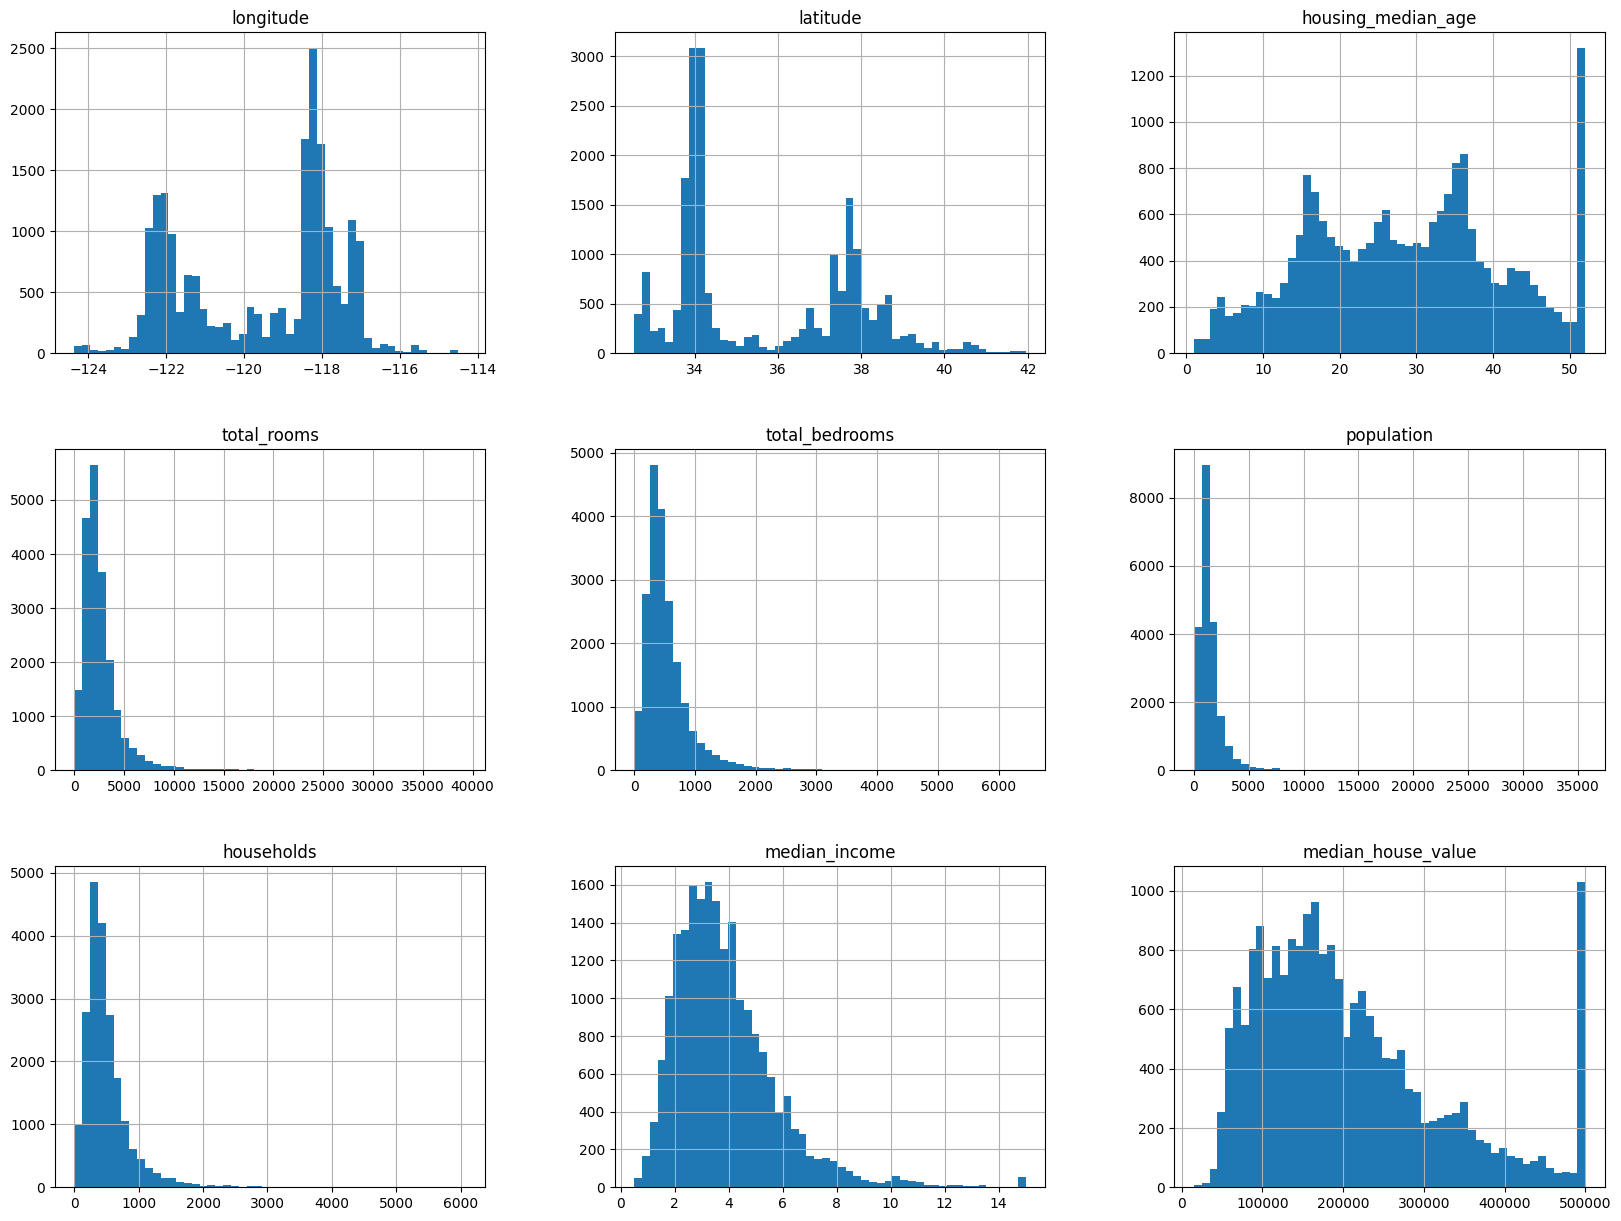

In [5]:
"""
Kolejnym krokiem, który podjeliśmy w celu analizy danych było narysowanie histogramów.
Na histogramach należy zwrócić uwagę na:
1) Atrybut median_income nie przypomina danych podawanych w dolarach amerykańskich (USD).
   Wydaje nam się, że są to wartości już przeskalowane na wartości od 0,5 do 15.
2) Ograniczeniu uległy również wartości median wieku oraz cen mieszkań.
3) Każdy z tych atrybutów jest przedstawiony w oddmiennych skalach, nieraz znacznie zróżnicowanych.
4) Wiele histogramów harakteryzuje się rozkładem długoogonowym. 
   Rozciągają się one znacznie bardziej po prawej stronie mediany niż po lewej.
   Może to utrudnić proces uczenia maszynowego.
"""

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))  # Parametr bins określa liczbę słupków na histogramie.
                                        # Liczba ta nie powinna być przypadkowa.
                                        # Więcej na https://stackoverflow.com/questions/33203645/how-to-plot-a-histogram-using-matplotlib-in-python-with-a-list-of-data.

## Podział danych na zbiór uczący oraz testowy

Zbiór uczący to dane, które zostaną wykorzystane w celu nauki modelu.
Zbiór testowy to dane, które zostaną wykorzystane do weryfikacji poprawności klasyfikacji modelu.
Przyjmuje się, że podział zbioru powinien być 80% dane uczące, 20% dane testowe.

W rzeczywistości podział danych na zbiór uczący oraz testowy nie jest zadaniem trywialnym.
Po pierwsze podziału należy dokonać dość wcześnie, aby uniknąć zjawiska zwanego ***obciążeniem związanym z podglądaniem danych***. Zjawisko to polega na mylnym dostrzeżeniu wzorca.

Po drugie musimy zagwarantować stabilność zestawu testowego, za każdym razem gdy uruchomimy program nawet po odświeżeniu zbioru danych. Innymi słowy chodzi, o uniknięcie mieszania zbioru uczącego z testowym.

Po trzecie dane testowe nie powinny być wybrane losowo. Dane powinny zostać tak dobrane, aby reprezentowały przykład całej populacji. Jest to tak zwane ***losowanie warstwowe***.
<br>Przykład:<br>
Zbiór testowy reprezentujący populację Stanów Zjednoczonych ma 1000 rekordów. Wiemy, że populacja USA liczy 51% kobiet oraz 49% mężczyzn. Z tego wynika, że zbiór testowy powinen liczyć 510 kobiet oraz 490 mężczyzn.


Text(0, 0.5, 'Cases')

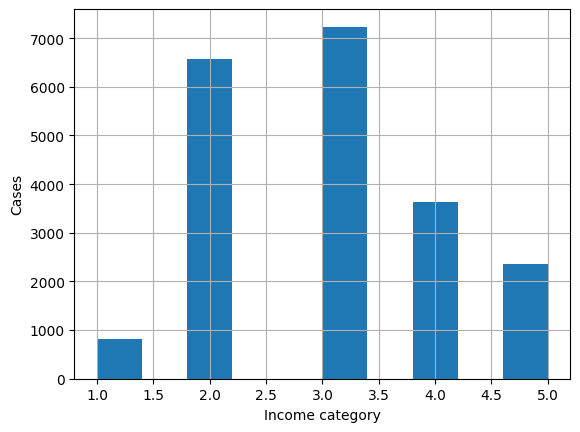

In [6]:
"""
Na podstawie informacji z https://www.kaggle.com/discussion,
wiemy że ważnym atrybutem pomagającym w prognozowaniu mediany cen mieszkań jest mediana dochodów.
Innymi słowy, powinnniśmy zagwarantować, aby zbiór testowy zawierał różne kategorie dochodów dla całego zbioru danych.
Na podstawie analizy histogramu median_income, wiemy jakie warstwy danych powinien zawierać nasz zbiór testowy.
W innym wypadku oszacowanie oznaczenia danej warstwy może być nieadekwatne do rzeczywistości.
Oznacza to, że nie możemy tworzyć zbyt wielu warstw i każda z nich powinna być wystarczająco duża.
Uznaliśmy, że do dobrym pomysłem będzie wygenerowanie atrybutu kategorii dochodu, która jako wartość przyjmie mediana/1,5,
a następnie scalenie wyników większych niż 5 w jedną kategorię.
"""

import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist()
plt.xlabel("Income category")
plt.ylabel("Cases")

In [7]:
"""
Teraz możemy próbkowanie (losowanie) warstwowe na podstawie kategorii dochodów.
"""
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [8]:
"""
Potwierdzamy, że mechanizm działa zgodnie z naszymi oczekiwaniami.
W tym celu sprawdzamy proporcje kategorii w całym zbiorze danych.
"""

housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [22]:
"""
Sprawdzamy proporcje kategorii w całym zbiorze testowym.
Widzimy, że proporcje się zgadzają.
Widać zatem, że zbiór testowy wygenerowany przy użyciu losowania warstowego ma proporcje niemal identyczne jak
przy pełnym zbiorze danych.
"""

strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [9]:
"""
Usuwamy atrybut income_cat, aby przywrócić dane do pierwotnej postacji.
"""

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Odkrywanie zależności i wizualizacja danych

In [10]:
"""
Tworzymy kopię zbioru uczącego, aby móc pracować na nim bez strachu uszkodzenia danych.
"""

housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

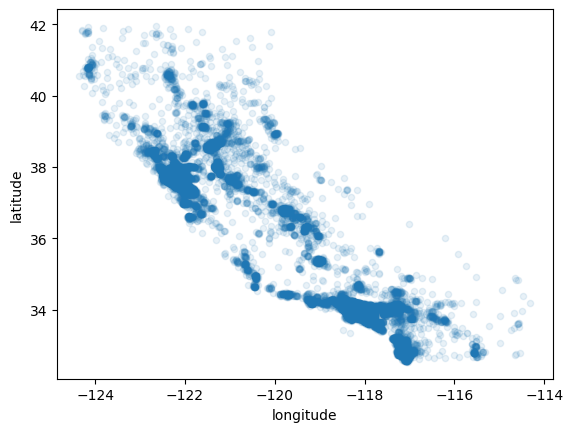

In [11]:
"""
Wizualizację danych zaczynamy od stowrzenia wykresu punktowego wszystkich dystryktów
względem ich rozmieszczenia w układzie współrzędnych.
Poniższy wykres przypomina mapę Kalifornii. Można zauważyć, że największe zagęszczenie panuje w obszarze Bay Area,
Los Angeles oraz San Diego.
"""

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) # Ustawienie parametru alpha na 0.1 pozwala na zaznaczenie dużego zagęszczenia dystryktów.

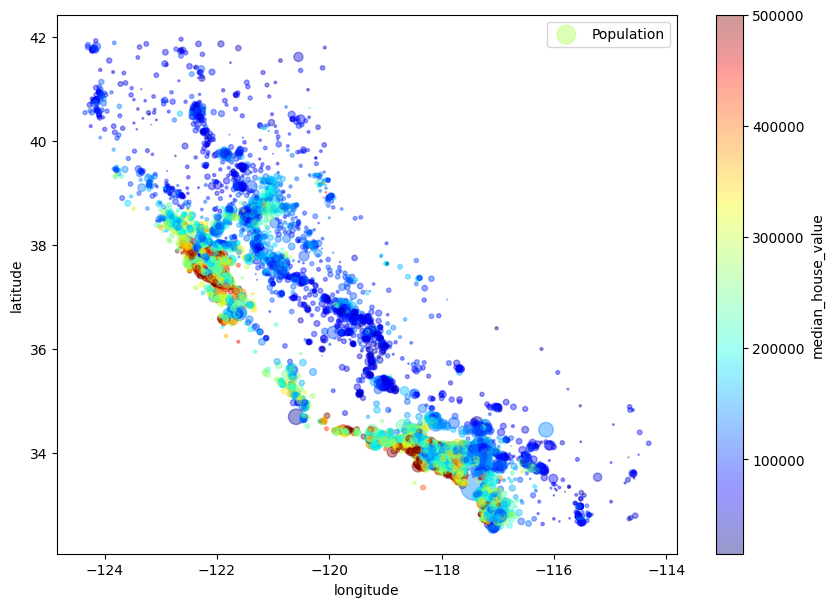

In [12]:
"""
Następnym krokiem jest wizualizacja mapy mapy z cenami mieszkań. Do tego celu warto wykorzystać kolorowy wykres.
Promień każdego kółka symbolizuje populację dystryktu, kolor natomiast ceny mieszkań.

Z poniższego wykresu możemy odczytać, że ceny mieszkań są zależne od położenia geograficznego (np. od odległości od oceanu).
"""

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="Population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

## Poszukiwanie korelacji

In [13]:
"""
Następnym krokiem w analizie danych jest poszukiwanie korelacji. 
W tym celu wykorzystamy metodę corr wbudowaną w bibliotekę pandas.
"""

corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [14]:
"""
Istnieje również możliwość wyodrębnienia korelacji każdego atrybutu z medianą cen mieszkań.
Wartości współczynnika mieszczą się między -1 a 1.Wartości zbliżone do 1 wskazują silną korelajcę dodatnią.
Wartości współczynnika zbliżone do -1 mówią nam, że silna korelacja ujemna.
Wartości bliskie zera oznaczają brak korelacji liniowej.
Należy pamiętać, że korelacja liniowa może nie uwzględniać zależności nieliniowej.
"""

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

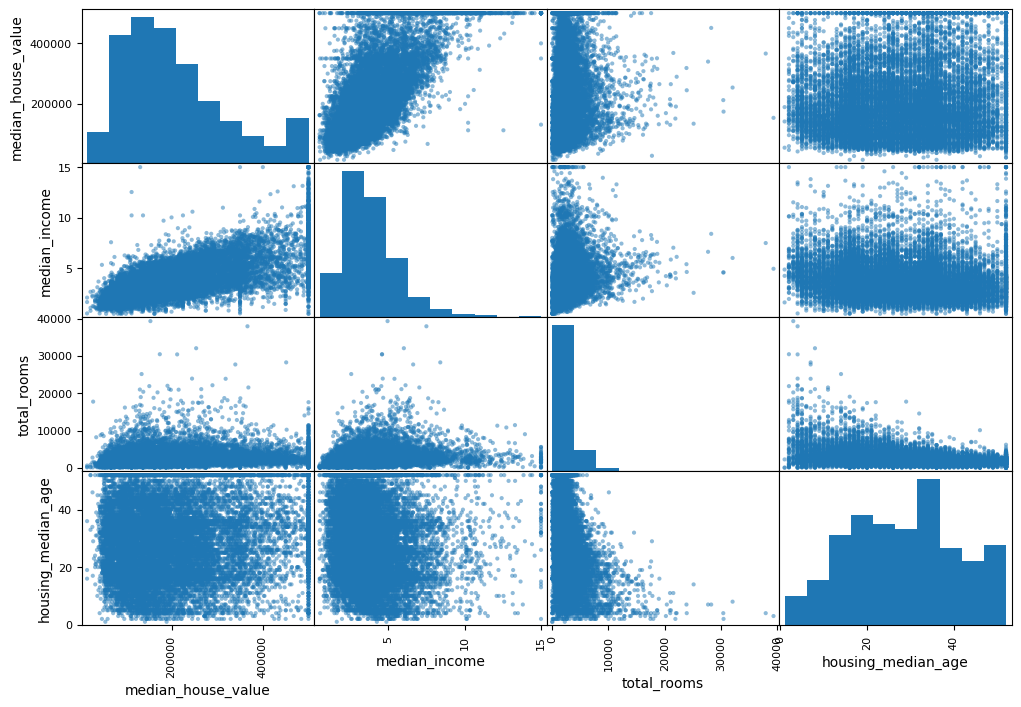

In [15]:
"""
Innym sposobem sprawdzenia korelacji pomiędzy atrybutami jest użycie funkcji scatter_matrix z biblioteki pandas.
"""

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

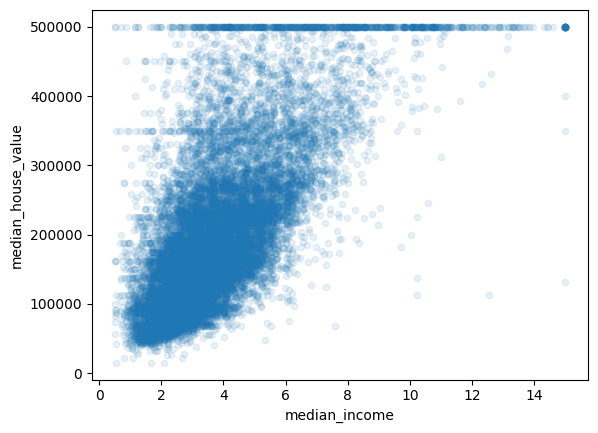

In [16]:
"""
Najbardziej obiecującym atrybutem służącym do progozowania mediany cen mieszkań jest mediana dochodów.
Z poniższego wykresu możemy zauważyć, że korelacja między medianą przychodów a medianą cen mieszkań jest silna
(widać tendencję wzrostową). 
Ograniczenie ceny jest widoczne na poziomie 500 000 USD. 
"""

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [18]:
"""
Na podstawie atrybutów, można spróbować wyliczyć dodatkowe atrybutu, które mogą być istotne dla wyceny mieszkania.
"""

housing["rooms_per_family"] = housing["total_rooms"]/housing["households"]
housing["sleeping_rooms_per_rooms"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_family"]=housing["population"]/housing["households"]

In [19]:
"""
Okazuje się, że atrybut sleeping_rooms_per_rooms jest bardziej skorelowany z ceną mieszkania,
niż total_bedrooms lub total_rooms.
Można z tego wyciągnąć wnioski, że mieszkania o mniejszym współczynniku liczby sypilani do pokoi okazują się droższe.
"""

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_family            0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_family      -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
sleeping_rooms_per_rooms   -0.259984
Name: median_house_value, dtype: float64

## Przygotowanie danych pod uczenie maszynowe

In [26]:
"""
Przygotowanie danych do uczenia maszynowego rozpoczniemy od usunięcia etykiet
(predykcji, którą chcemy osiągnąć dzięki naszemu modelowi).
"""

housing = strat_train_set.drop("median_house_value", axis=1) # usuwa etykiety w zbiorze uczącym
housing_labels = strat_train_set["median_house_value"].copy()

In [28]:
"""
Większość algorytmów uczenia maszynowego nie może działać poprawnie, gdy brakuje jakiś cech (wartości atrybutów).
W rodziale "Wstępna analiza danych" wspomnieliśmy, że w naszym zbiorze występuje właśnie taka sytuacja.

Aby model został nauczony prawidłowo, musimy wybrać jedną z trzech opcji:
1) pozbyć się dystryktów zawierających brakujące dane
housing.dropna(subnet=["total_bedrooms"])

2) pozbyć sie całego atrybutu
housing.drop("total_bedrooms", axis=1)

3) uzupełnić dane określoną wartością. 
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

Moduł Scikit-Learn zawiera przydatną klasę zajmującą się brakującymi wartościami.
Nazwa tej klasy to Imputer. Wykorzystamy ją w tym zadaniu do uzupełnienia brakująych daych danego atrybutu,
medianą danego atrybutu.
"""

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop('ocean_proximity', axis=1) # mediana może zostać stworzona tylko dla wartości numerycznych, dlatego należy usunąć atrybuty tekstowe.
imputer.fit(housing_num)
imputer.statistics_ # mediany atrybutów.

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [35]:
"""
Uzupełniamy brakujące dane w zbiorze uczącym obliczonymi medianami.
"""

X = imputer.transform(housing_num) # obiekt zwrócony to tablica.
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index) # umieszczenie tablicy w obiektcie numpy.

In [41]:
"""
Nalezy uzupełnić jeszcze brakujące wartości testowe w atrybucie ocean_proximity.
W tym celu posłużymy się klasą LabelEncoder z biblioteki Sklearn.
Klasa LabelEncoder zamienia teks na liczby, co umożliwia obliczenie mediany.
"""

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [45]:
"""
Powyższe rozwiązanie nie jest jednak idealne, ponieważ algorytmy uczenia maszynowego będą uważać,
że dwie zbliżone do siebie wartości będą bardziej podobne do siebie niż do dalszych wartości.
Powszechnym rozwiązaniem tego problemu jest stworzenie jednego binarnego atrybutu dla każdej kategorii.
Jeden atrybut ma wartość 1, gdy kategorią jest 1H <OCEAN (w przeciwnym wypadku atrybut otrzymuje cechę 0).
Inny atrybut otrzymuje 1 dla wartości INLAND. Jest to tak zwane kodowanie "gorącojedynkowe",
ponieważ tylko jeden atrybut będzie "gorący".
"""

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [53]:
"""
Następnym krokiem jest skalowanie cech.
Większość alogrytmów źle sobie radzi z atrybutami numerycznymi znajdującymi się w różnej skali.
Ten problem dotyczy również zbioru z tego ćwiczenia.

Dane możemy przeskalować na dwa sposoby:

1) Skalowanie min-max (normalizacja), wartości są skalowane między 0 - 1.
Dokonujemy tego odejmując od danej wartości wartość minimalną i
dzieląc otrzymany wynik przez różnicę wartości maksymalnej i minimalnej.

2) Standaryzacja, najpierw odejmujemy od danej wartości średnią, a następnie dzielimy ją przez wariancję.
Standaryzacja nie ogranicza wartości do danego zakresu. Jest również znacznie mniej wrażliwa na wartości odstające.
"""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(housing_cat_1hot)
housing_scale = scaler.transform(housing_cat_1hot)
housing_scale

array([[-0.82311551],
       [-0.82311551],
       [ 1.99314708],
       ...,
       [-0.11904986],
       [-0.82311551],
       [ 1.28908144]])

In [71]:
"""
Podsumowując proces przygotowania danych sklada sie z następująych kroków:
1) Uzupełnić brakujące dane lub usunąć atrybuty zawierające brakujące cechy,
2) Przekształcenie wartości string na liczbowe,
3) Skalowanie

Wszystkie te czynności można automatycznie za pomocą potoków (pipeline).
"""

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# ===============================================================================

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_family", "population_per_family"],
    index=housing.index
)

# ===============================================================================

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

# ===============================================================================

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

housing_prepared.shape

(16512, 16)

## Trenowanie i ocena modelu za pomocą zbioru uczącego

In [97]:
"""
W kroku poniżej uczymy model regresjii liniowej.
"""

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [74]:
"""
Możemy przetestować teraz model.
Można zauważyć, że model działa, ale prognozy nie są dokładne.
Różnice w oczekiwanych wartościach, a prognozowanych sięgają ok.40%.
"""

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Prognozy:", lin_reg.predict(some_data_prepared))
print("Etykiety:", list(some_labels))

Prognozy: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Etykiety: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


## Błąd RMSE

Błąd RMSE (pierwiastek błędu średniokwadratowego) jest jedym ze sposobów pomiaru metryki wydajności modelu.
Określa on, w jakim stopniu model myli się w przewidywaniach. Wraz ze wzrostem wartości błędu, rośnie również waga tej metryki.

In [96]:
"""
Błąd predykcji cen mieszkań wynosi ok 70 tys USB,
przy czym mediana cen mieszkań dla większości dystryktów mieszczą się w przedziale 120 tys USD - 265 tys USD.
"""

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

## Co poszło nie tak? Czyli sprawdzamy inne modele.
Powyższa sytuacja to klasyczne niedotrenowanie modelu wobec danych uczących. Zjawisko to występuje najczęściej, gdy model jest zbyt prosty, aby wyuczyć się struktór danych uczących.

Głównymi sposobami rozwiązania tego problemu są:
1) Wybór potężniejszego modulu
<br>
2) dołączenie większej liczby cech do algorytmu uczącego
<br>
3) zmniejszenie ograniczeń modelu (np. zredukowanie hiperparametrów modelu)

In [77]:
"""
Model przedstawiony w ćwiczeniu nie jest regularyzowany (nie ustawiamy parametrów modelu podczas uczenia),
dlatego ostatnia możliwość odpada.

Spróbowaliśmy więc sprawdzić rezultaty dla drzewa decyzyjnego.
"""

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

"""
Na pierwszy rzut oka może wydawać się, że model oparty na drzewie decyzyjnym nie ma żadnych błędów.
Taka sytuacja może świadczyć o tym, że model został przetrenowany.
"""

0.0

In [3]:
"""
Termin przetrenowany" oznacza, że model sprawdza się w przypadku danych uczących,
ale sam proces uogólniania nie poszedł zbyt dobrze.
Sprawdziliśmy więc model za pomocą metody kroswalidacji (sprawdzianu krzyżowego).

Kroswalidacja polega na rozwiciu zbioru uczącego na n-podziorów.
Następnie przeprowadzane jest n-krotne przeprowadzanie trenowanie i ocenanie modelu trzewa decyzyjnego.
"""

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Wyniki:", scores)
    print("Średnia:", scores.mean())
    print("Odchylenie standardowe:", scores.std())

display_scores(tree_rmse_scores)

"""
Model drzewa decyjnego po wynikach nie wygląda już tak dobrze.
"""
pass

NameError: name 'tree_reg' is not defined

In [99]:
"""
Porównajmy rezultat z regresją liniową.
"""

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

"""
Odchylenie standardowe jest nawet większe niż w przypadku regresji liniowej.
"""
pass

Wyniki: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Średnia: 69052.46136345083
Odchylenie standardowe: 2731.674001798342


In [88]:
"""
Postaowiliśmy sprawdzić jeszcze jeden model, mianowicie las losowy.
"""

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [89]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

"""
Wyniki są bardziej obiecujące, niż w przypadku drzewa decyzji.
"""
pass

Wyniki: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Średnia: 50182.303100336096
Odchylenie standardowe: 2097.0810550985693


## Dostrojenie modelu

W przypadku lasu losowego istnieje możliwość jego dostrojenia poprzez hiperparametry (parametry podczas uczenia).

In [90]:
"""
Dostroić model można ręcznie, lecz jest to żmudne zajęcie.
W tym ćwiczeniu wykorzystaliśmy klasę GridSearchCV z biblioteki sklearn.
Proces dostrojenia w tym przypadku polega na podaniu wartości interesująych nas hiperparametrów.
Zostaną one ocenione na podstawie kroswalidacji.
"""

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [91]:
"""
Najlepsze rezultaty predykcji modelu osiągnięto dla:
"""

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [92]:
"""
Podsumowanie dostrojenia:
"""

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

## Ocena modelu za pomocą zbioru testowego

Po etapie strojenia modelu powinniśmy uzyskać predykcyjne rezultaty bliskie naszym oczekiwaniom.
Trafność predykcji należy określić na zbiorze testowym.

In [94]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(f"Final mse: {final_mse}")
print(f"Final rmse: {final_rmse}")

Final mse: 2278174560.2938914
Final rmse: 47730.22690385927
